### Importing required libraries

In [1]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

### Importing datasets of eight connections

In [55]:
file_name="075"
folder_name = "075"
first_dataset = pd.read_csv(f"eight_conn_multi_amp/p{folder_name}/first__connection_topo2_p{file_name}.csv")
second_dataset = pd.read_csv(f"eight_conn_multi_amp/p{folder_name}/second__connection_topo2_p{file_name}.csv")
third_dataset = pd.read_csv(f"eight_conn_multi_amp/p{folder_name}/third__connection_topo2_p{file_name}.csv")
fourth_dataset = pd.read_csv(f"eight_conn_multi_amp/p{folder_name}/fourth__connection_topo2_p{file_name}.csv")
fifth_dataset = pd.read_csv(f"eight_conn_multi_amp/p{folder_name}/fifth__connection_topo2_p{file_name}.csv")
sixth_dataset = pd.read_csv(f"eight_conn_multi_amp/p{folder_name}/sixth__connection_topo2_p{file_name}.csv")
seventh_dataset = pd.read_csv(f"eight_conn_multi_amp/p{folder_name}/seventh__connection_topo2_p{file_name}.csv")
eighth_dataset = pd.read_csv(f"eight_conn_multi_amp/p{folder_name}/eighth__connection_topo2_p{file_name}.csv")

In [56]:
df = pd.concat([first_dataset, second_dataset, third_dataset, fourth_dataset,fifth_dataset,sixth_dataset,seventh_dataset,eighth_dataset ])
dataset = df.copy()

In [57]:
# get the hop count for the connection

data = [first_dataset, second_dataset, third_dataset, fourth_dataset,fifth_dataset,sixth_dataset,seventh_dataset,eighth_dataset ]
for i in range(len(data)):
    print("connection ",i+1, "Hop count ", round([ i/17/4 for i in data[i]['path'].unique()][0]))


connection  1 Hop count  3
connection  2 Hop count  2
connection  3 Hop count  3
connection  4 Hop count  3
connection  5 Hop count  3
connection  6 Hop count  2
connection  7 Hop count  2
connection  8 Hop count  2


In [138]:
# def get_max(train, test, col):
#     return max(train[col].max(), test[col].max())

# for col in df.columns[80:]:
#     max_val = get_max(dataset, fifth_dataset, col)
#     df[col] = df[col]/max_val

# for col in fifth_dataset.columns[80:]:
#     max_val = get_max(dataset, fifth_dataset, col)
#     fifth_dataset[col] = fifth_dataset[col]/max_val

In [4]:
df

,1,2,3,4,5,6,7,8,9,10,...,80,ch,pw,path,s_ase,e_ase,s_osnr,e_osnr,s_gosnr,e_gosnr
0,0,0,0,0,0,0,0,0,0,0,...,0,58,-17.020083,272.001,6.927406e-08,6.927406e-08,24.574210,24.574210,23.387365,23.387365
1,0,0,0,0,0,0,0,0,0,0,...,0,16,-17.019773,272.001,6.885698e-08,6.885698e-08,24.600748,24.600748,23.455939,23.455939
2,0,0,0,0,0,0,0,0,0,0,...,0,58,-17.020352,272.001,6.895174e-08,6.895174e-08,24.594196,24.594196,23.328982,23.328982
3,0,0,0,0,0,0,0,0,0,0,...,0,16,-17.019828,272.001,6.893602e-08,6.893602e-08,24.595710,24.595710,23.443693,23.443693
4,0,0,0,0,0,0,0,0,0,0,...,0,37,-17.020295,272.001,6.874572e-08,6.874572e-08,24.607248,24.607248,23.341315,23.341315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,76,-17.026678,204.001,5.183653e-08,5.183653e-08,25.826963,25.826963,22.139096,22.139096
3236,1,1,1,1,1,1,1,1,1,1,...,1,77,-17.026316,204.001,5.184527e-08,5.184527e-08,25.826593,25.826593,22.199079,22.199079
3237,1,1,1,1,1,1,1,1,1,1,...,1,78,-17.025817,204.001,5.185279e-08,5.185279e-08,25.826462,25.826462,22.283160,22.283160
3238,1,1,1,1,1,1,1,1,1,1,...,1,79,-17.025040,204.001,5.185976e-08,5.185976e-08,25.826655,25.826655,22.417353,22.417353


In [140]:
# df['pw'] = df['pw']/get_max(dataset, fifth_dataset, col)

In [141]:
# fifth_dataset['pw'] = fifth_dataset['pw']/get_max(dataset, fifth_dataset, col)

In [142]:
# df.to_csv('five_conn/norm/normalized_training_connection_topo_p0.csv')
# fifth_dataset.to_csv('five_conn/norm/normalized_test_connection_topo_p0.csv')


In [5]:
features = df.copy()
features.drop(features.columns[-1:-6:-1], axis=1, inplace=True) #[-1:-6:-1] -1:-4:-1
target = df[df.columns[-1:-4:-2]]

In [6]:
features

,1,2,3,4,5,6,7,8,9,10,...,75,76,77,78,79,80,ch,pw,path,s_ase
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,58,-17.020083,272.001,6.927406e-08
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,-17.019773,272.001,6.885698e-08
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,58,-17.020352,272.001,6.895174e-08
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,16,-17.019828,272.001,6.893602e-08
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,37,-17.020295,272.001,6.874572e-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,76,-17.026678,204.001,5.183653e-08
3236,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,77,-17.026316,204.001,5.184527e-08
3237,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,78,-17.025817,204.001,5.185279e-08
3238,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,79,-17.025040,204.001,5.185976e-08


In [7]:
target

,e_gosnr,e_osnr
0,23.387365,24.574210
1,23.455939,24.600748
2,23.328982,24.594196
3,23.443693,24.595710
4,23.341315,24.607248
...,...,...
3235,22.139096,25.826963
3236,22.199079,25.826593
3237,22.283160,25.826462
3238,22.417353,25.826655


In [8]:
# X_test = fifth_dataset.copy()
# X_test.drop(X_test.columns[-1:-4:-1], axis=1, inplace=True)
# y_test = fifth_dataset[fifth_dataset.columns[-1]]

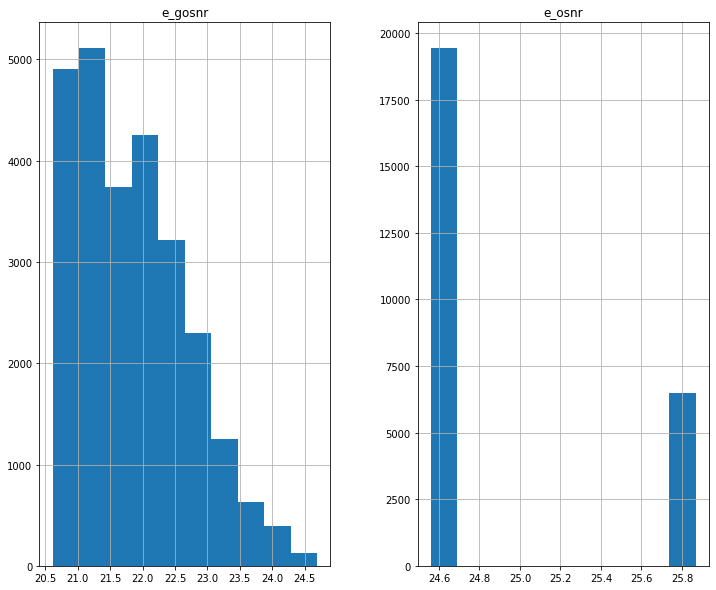

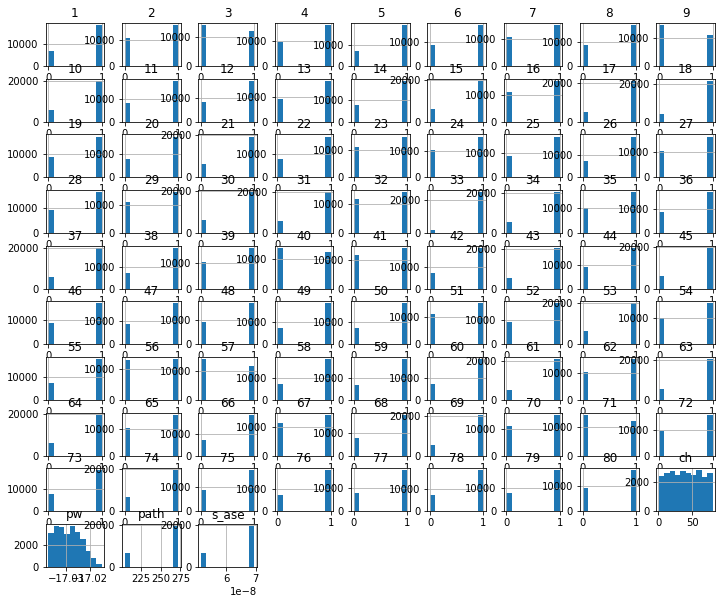

In [9]:
target.hist(figsize = (12,10))
features.hist(figsize = (12,10))
plt.show()

In [148]:
# X_train = X_train.to_numpy()
# y_train = y_train.to_numpy()
# X_test = X_test.to_numpy()
# y_test = y_test.to_numpy()

In [149]:
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 1)

### Lasso Model for p={}

In [151]:
C=[50,100, 500,1000,1500,2000]
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score


for Ci in C:
    model = Lasso(alpha=1/(2*Ci),max_iter=1000000)
    _ = model.fit(X_train,y_train)
    preds = model.predict(X_test)
    print(f"C = {Ci}")
    print("Training score:", model.score(X_train, y_train))
    print("Testing score:", model.score(X_test, y_test))
    print("MAE of Lasso Regression:", mean_absolute_error(y_test, preds))
    print("RMSE of Lasso Regression:", np.sqrt(mean_squared_error(y_test, preds)), '\n')
    # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
    # print(f"{Ci} {model.score(Xtest,ytest)}")

C = 50
Training score: 0.9637554813251761
Testing score: 0.9625732692564029
MAE of Lasso Regression: 0.12819795320759492
RMSE of Lasso Regression: 0.21272843668409325 

C = 100
Training score: 0.9651773132243795
Testing score: 0.9640378526590161
MAE of Lasso Regression: 0.12553311909429857
RMSE of Lasso Regression: 0.20851618334089986 

C = 500
Training score: 0.9658940467903327
Testing score: 0.9647402308384505
MAE of Lasso Regression: 0.12370342742203266
RMSE of Lasso Regression: 0.20646556585322878 

C = 1000
Training score: 0.9659247986882442
Testing score: 0.9647637585304565
MAE of Lasso Regression: 0.12349301004816872
RMSE of Lasso Regression: 0.20639896750786563 

C = 1500
Training score: 0.9686455564553885
Testing score: 0.967586594347186
MAE of Lasso Regression: 0.1185163702905245
RMSE of Lasso Regression: 0.19794171546571443 

C = 2000
Training score: 0.9809380030991754
Testing score: 0.9803569866445894
MAE of Lasso Regression: 0.09264871693901845
RMSE of Lasso Regression: 0.

### Ridge Model for p = 0

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score

C=[0.05, 0.5, 5, 10, 50]
for Ci in C:
    ridge = Ridge(alpha=1/(2*Ci),max_iter=10000)
    _ = ridge.fit(X_train,y_train)
    pred_train= ridge.predict(X_test)
    print(f"C = {Ci}")
    # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
    print("Training score:", ridge.score(X_train, y_train))
    print("Testing score:", ridge.score(X_test, y_test))
    print("MAE of Ridge Regression:", mean_absolute_error(y_test, pred_train))
    print("RMSE of Ridge Regression:", np.sqrt(mean_squared_error(y_test, pred_train)), '\n')


C = 0.05
Training score: 0.947138050621479
Testing score: 0.9444549661422033
MAE of Ridge Regression: 0.11343979959931337
RMSE of Ridge Regression: 0.19748126704013852 

C = 0.5
Training score: 0.9527166575076724
Testing score: 0.9503174785028351
MAE of Ridge Regression: 0.10732702136785896
RMSE of Ridge Regression: 0.18675758108912904 

C = 5
Training score: 0.9795165005148359
Testing score: 0.9785137566660302
MAE of Ridge Regression: 0.07068055823328634
RMSE of Ridge Regression: 0.12272213239772155 

C = 10
Training score: 0.9886093154310278
Testing score: 0.9880851804856534
MAE of Ridge Regression: 0.05234912254456519
RMSE of Ridge Regression: 0.09128783852502584 

C = 50
Training score: 0.9971930115776432
Testing score: 0.9971318193501573
MAE of Ridge Regression: 0.02479729532372829
RMSE of Ridge Regression: 0.04444152093261009 



In [17]:
# RMSE vs train_test_split ratio

Ci = 0.5
std_error_mean = []
train_split = []
mae_error_mean = []
for splt in [20, 30, 40, 50, 60, 70, 80, 90]:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=splt/100, random_state = 1)
    ridge = Ridge(alpha=1/(2*Ci),max_iter=10000)
    _ = ridge.fit(X_train,y_train)
    pred_train= ridge.predict(X_test)
    print(f"C = {Ci}")
    # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
    print("Training score:", ridge.score(X_train, y_train))
    print("Testing score:", ridge.score(X_test, y_test))
    MAE = mean_absolute_error(y_test, pred_train)
    RMSE = np.sqrt(mean_squared_error(y_test, pred_train))
    print("MAE of Ridge Regression:", MAE)
    print("RMSE of Ridge Regression:", RMSE, '\n')
    train_split.append(splt)
    std_error_mean.append(RMSE)
    mae_error_mean.append(MAE)

C = 0.5
Training score: 0.9527166575076724
Testing score: 0.9503174785028351
MAE of Ridge Regression: 0.10732702136785896
RMSE of Ridge Regression: 0.18675758108912904 

C = 0.5
Training score: 0.9517003636896268
Testing score: 0.9510793376812259
MAE of Ridge Regression: 0.10720069506005857
RMSE of Ridge Regression: 0.18616742214443427 

C = 0.5
Training score: 0.9510414022690923
Testing score: 0.9501644051251563
MAE of Ridge Regression: 0.10807849754166629
RMSE of Ridge Regression: 0.18798709962547766 

C = 0.5
Training score: 0.9500540272362314
Testing score: 0.9497433582845265
MAE of Ridge Regression: 0.10903388632838065
RMSE of Ridge Regression: 0.1891759586770885 

C = 0.5
Training score: 0.9491954583484354
Testing score: 0.9488388707709281
MAE of Ridge Regression: 0.11003952637242406
RMSE of Ridge Regression: 0.19088979466882033 

C = 0.5
Training score: 0.9486660978666708
Testing score: 0.9477360664946946
MAE of Ridge Regression: 0.11062157563307635
RMSE of Ridge Regression: 0.1

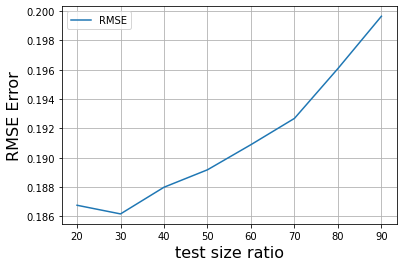

In [19]:
plt.figure(0)
plt.plot(train_split, std_error_mean, label='RMSE')
#plt.plot(train_split, label='train_test_split')
plt.xlabel('test size ratio', fontsize=16)
plt.ylabel('RMSE Error', fontsize=16)
plt.legend()
plt.grid(True)

C = 0.5
Training score: 0.9489678553833238
Testing score: 0.946389474391659
MAE of Ridge Regression: 0.11365616920403881
RMSE of Ridge Regression: 0.2000166843868163 

C = 0.5
Training score: 0.948615289010939
Testing score: 0.945721177885327
MAE of Ridge Regression: 0.11068829723715636
RMSE of Ridge Regression: 0.19530821537658083 

C = 0.5
Training score: 0.948582275830111
Testing score: 0.9479281229966616
MAE of Ridge Regression: 0.10795004764209284
RMSE of Ridge Regression: 0.1884068634787094 

C = 0.5
Training score: 0.9495870727046563
Testing score: 0.9475670479526248
MAE of Ridge Regression: 0.11052055118735224
RMSE of Ridge Regression: 0.1943477598421621 

C = 0.5
Training score: 0.9502766411681719
Testing score: 0.9491790220178713
MAE of Ridge Regression: 0.10993126739115851
RMSE of Ridge Regression: 0.19166456453292277 

C = 0.5
Training score: 0.9506299762382124
Testing score: 0.9504397934208111
MAE of Ridge Regression: 0.10789517481038087
RMSE of Ridge Regression: 0.1887132

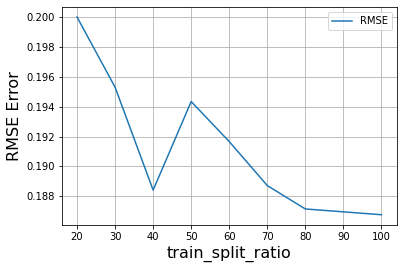

In [58]:

Ci = 0.5
std_error_mean = []
train_split = []
mae_error_mean = []
for splt in [20, 30, 40, 50, 60, 70, 80]:
    X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=splt/100, random_state = 1)
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state = 1)
    ridge = Ridge(alpha=1/(2*Ci),max_iter=10000)
    _ = ridge.fit(X_train,y_train)
    pred_train= ridge.predict(X_test)
    print(f"C = {Ci}")
    # print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
    print("Training score:", ridge.score(X_train, y_train))
    print("Testing score:", ridge.score(X_test, y_test))
    MAE = mean_absolute_error(y_test, pred_train)
    RMSE = np.sqrt(mean_squared_error(y_test, pred_train))
    print("MAE of Ridge Regression:", MAE)
    print("RMSE of Ridge Regression:", RMSE, '\n')
    train_split.append(splt)
    std_error_mean.append(RMSE)
    mae_error_mean.append(MAE)
    

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 1)
ridge = Ridge(alpha=1/(2*Ci),max_iter=10000)
_ = ridge.fit(X_train,y_train)
pred_train= ridge.predict(X_test)
print(f"C = {Ci}")
# print(f" coefficient value for c= {Ci} are: \n {model.coef_} and \n intercept = {model.intercept_}")
print("Training score:", ridge.score(X_train, y_train))
print("Testing score:", ridge.score(X_test, y_test))
MAE = mean_absolute_error(y_test, pred_train)
RMSE = np.sqrt(mean_squared_error(y_test, pred_train))
print("MAE of Ridge Regression:", MAE)
print("RMSE of Ridge Regression:", RMSE, '\n')
train_split.append(100)
std_error_mean.append(RMSE)
mae_error_mean.append(MAE)

plt.figure(0)
plt.plot( train_split,std_error_mean, label='RMSE')
#plt.plot(train_split, label='train_test_split')
plt.xlabel('train_split_ratio', fontsize=16)
plt.ylabel('RMSE Error', fontsize=16)
plt.legend()
plt.grid(True)

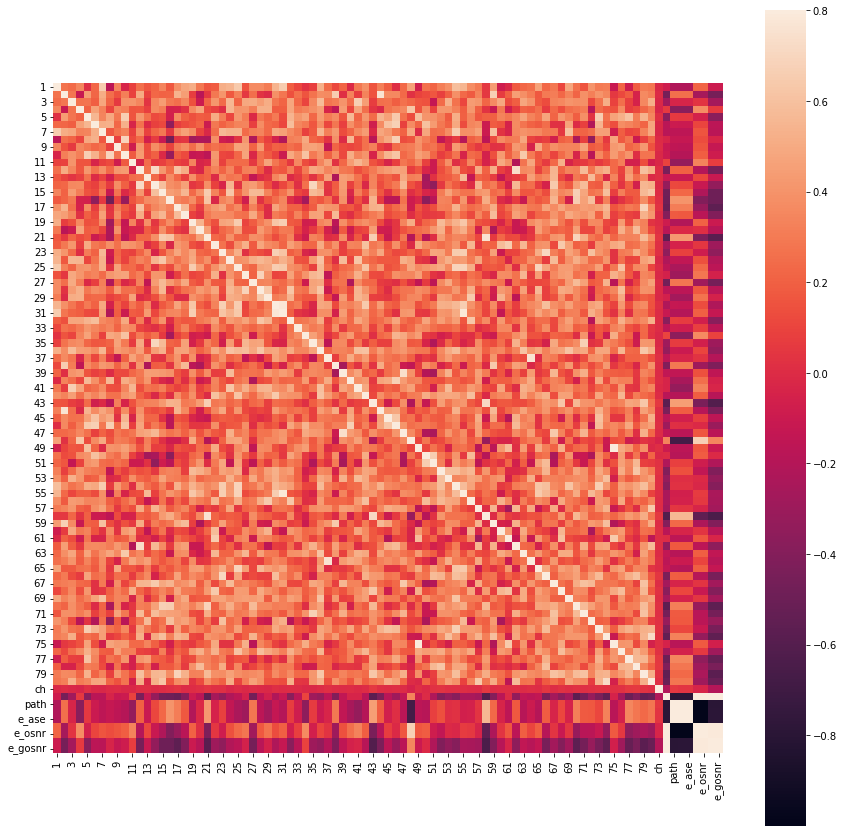

In [154]:
Cx = dataset.corr()
fig = plt.figure(figsize = (15,15))
sb.heatmap(Cx, vmax = .8, square = True)
plt.show()

### RandomForest Model for p={}

In [155]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score

estimators=[100, 200, 300, 1000]
for  Ei in estimators:
    print(f"Estimator - {Ei}")
    model = RandomForestRegressor(n_estimators=Ei)
    model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    MAE = mean_absolute_error(y_test , predicted)
    print('Random forest validation MAE = ', MAE)
    # Display accuracy score
    print(f'Random forest accuracy = ', model.score(X_test, y_test))
    print(f'RMSE forest = ', np.sqrt(mean_squared_error(y_test , predicted)))

Estimator - 100
Random forest validation MAE =  0.001699999732160673
Random forest accuracy =  0.9999880647640731
RMSE forest =  0.003101708443335885
Estimator - 200
Random forest validation MAE =  0.0016736089367613747
Random forest accuracy =  0.9999881623977658
RMSE forest =  0.003087635141993197
Estimator - 300
Random forest validation MAE =  0.0016738970865727391
Random forest accuracy =  0.9999881550003155
RMSE forest =  0.00308741411789232
Estimator - 1000
Random forest validation MAE =  0.0016666402047525188
Random forest accuracy =  0.9999882435901615
RMSE forest =  0.0030751600611394155


### LinearRegression Model for p={}


In [156]:
# LINEARREGRESSION MODEL 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = 1)
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X_train, y_train) 
print("accuracy score for linear: ", linear.score(X_test,y_test))
print("RMSE for linear :",np.sqrt(mean_squared_error(y_test,linear.predict(X_test))))
print("MAE for linear", mean_absolute_error(y_test , linear.predict(X_test)))
r2_score(y_test,linear.predict(X_test))

accuracy score for linear:  0.9969564852730505
RMSE for linear : 0.06067307804277091
MAE for linear 0.03458839398250797


0.9969564852730505

In [157]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state = 1)
model = RandomForestRegressor()
model.fit(X_train,y_train)
predicted = model.predict(X_test)
MAE = mean_absolute_error(y_test , predicted)
print('Random forest validation MAE = ', MAE)
# Display accuracy score
print(f'Random forest accuracy = ', model.score(X_test, y_test))
print(f'RMSE forest = ', np.sqrt(mean_squared_error(y_test , predicted)))

Random forest validation MAE =  0.0017025780074234444
Random forest accuracy =  0.9999879592595111
RMSE forest =  0.003114659506486961


## CNN MODEL

### normalize the dataset

In [314]:
X=features.values
y=target['e_gosnr'].values
# y=target['e_osnr'].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler
PredictorScaler=StandardScaler()
TargetVarScaler=StandardScaler()

# Storing the fit object for later reference
y = y.reshape(-1,1)
PredictorScalerFit=PredictorScaler.fit(X)
TargetVarScalerFit=TargetVarScaler.fit(y)

# Generating the standardized values of X and y
X=PredictorScalerFit.transform(X)
y=TargetVarScalerFit.transform(y)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(18144, 84)
(18144, 1)
(7776, 84)
(7776, 1)


### train the model

In [315]:
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow import math as TFmath
# Mean absolute error
def customLoss(y_actual, y_pred):
  # Calculate the number of loaded channel
  no_loaded_channels = tf.dtypes.cast(TFmath.count_nonzero(y_actual),
                                      tf.float32)
  # Set the values of the unloaded channels to zero
  modified_y_pred = TFmath.divide_no_nan(TFmath.multiply(y_pred, y_actual),
                                         y_actual)
  # Calculate the loss
  error = TFmath.abs(TFmath.subtract(modified_y_pred, y_actual))
  loss = TFmath.divide(TFmath.reduce_sum(error), no_loaded_channels)
  return loss


normalizer = layers.Normalization(axis=-1)
normalizer.adapt(X_train)

model = keras.Sequential([
  normalizer,
  layers.Dense(84, activation='relu', name='fc1'),
  layers.Dense(256, activation='relu', name='fc2'),
  layers.Dense(128, activation='relu', name='fc3'),
  layers.Dense(128, activation='relu', name='fc4'),
  layers.Dense(128, activation='relu', name='fc5'),
  layers.Dense(1)
])
model.compile(loss=customLoss,
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
model.summary()
history = model.fit(X_train, y_train, batch_size=32, epochs=50, verbose=2,
                    validation_data=(X_test, y_test))


preds = model.predict(X_test)
print("MAE of Lasso Regression:", mean_absolute_error(y_test, preds))
print("RMSE of Lasso Regression:", np.sqrt(mean_squared_error(y_test, preds)), '\n')
print("R2 Score: ", r2_score(y_test, preds))

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_22 (Normaliza  (None, 84)               169       
 tion)                                                           
                                                                 
 fc1 (Dense)                 (None, 84)                7140      
                                                                 
 fc2 (Dense)                 (None, 256)               21760     
                                                                 
 fc3 (Dense)                 (None, 128)               32896     
                                                                 
 fc4 (Dense)                 (None, 128)               16512     
                                                                 
 fc5 (Dense)                 (None, 128)               16512     
                                                     

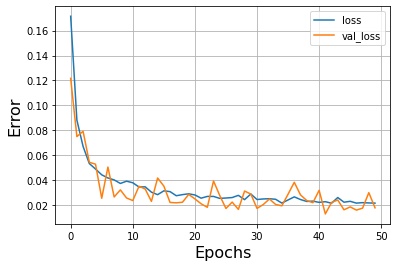

In [316]:
plt.figure(0)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Error', fontsize=16)
plt.legend()
plt.grid(True)